<a href="https://colab.research.google.com/github/ArpanSM/MachineLearningHackathons/blob/master/HackerEarth_Predict_The_Employee_Attrition.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##Load Data

In [ ]:
!wget https://he-s3.s3.amazonaws.com/media/hackathon/hackerearth-test-draft-1-106/predict-the-employee-attrition-rate-in-organizations-1d700a97/3f488f10aa3d11ea.zip
!unzip 3f488f10aa3d11ea.zip

--2020-06-14 12:33:33--  https://he-s3.s3.amazonaws.com/media/hackathon/hackerearth-test-draft-1-106/predict-the-employee-attrition-rate-in-organizations-1d700a97/3f488f10aa3d11ea.zip
Resolving he-s3.s3.amazonaws.com (he-s3.s3.amazonaws.com)... 52.219.132.176
Connecting to he-s3.s3.amazonaws.com (he-s3.s3.amazonaws.com)|52.219.132.176|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 225523 (220K) [application/zip]
Saving to: ‘3f488f10aa3d11ea.zip’

3f488f10aa3d11ea.zi 100%[===================>] 220.24K   292KB/s    in 0.8s    

2020-06-14 12:33:34 (292 KB/s) - ‘3f488f10aa3d11ea.zip’ saved [225523/225523]

Archive:  3f488f10aa3d11ea.zip
   creating: Dataset/
  inflating: Dataset/Train.csv       
  inflating: Dataset/Test.csv        
  inflating: Dataset/sample_submission.csv  


In [ ]:
import pandas as pd
df = pd.read_csv('/content/Dataset/Train.csv')
dft = pd.read_csv('/content/Dataset/Test.csv')

In [ ]:
df.isnull().sum()

Employee_ID                    0
Gender                         0
Age                          412
Education_Level                0
Relationship_Status            0
Hometown                       0
Unit                           0
Decision_skill_possess         0
Time_of_service              144
Time_since_promotion           0
growth_rate                    0
Travel_Rate                    0
Post_Level                     0
Pay_Scale                      9
Compensation_and_Benefits      0
Work_Life_balance             11
VAR1                           0
VAR2                         577
VAR3                           0
VAR4                         656
VAR5                           0
VAR6                           0
VAR7                           0
Attrition_rate                 0
dtype: int64

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7000 entries, 0 to 6999
Data columns (total 24 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Employee_ID                7000 non-null   object 
 1   Gender                     7000 non-null   object 
 2   Age                        6588 non-null   float64
 3   Education_Level            7000 non-null   int64  
 4   Relationship_Status        7000 non-null   object 
 5   Hometown                   7000 non-null   object 
 6   Unit                       7000 non-null   object 
 7   Decision_skill_possess     7000 non-null   object 
 8   Time_of_service            6856 non-null   float64
 9   Time_since_promotion       7000 non-null   int64  
 10  growth_rate                7000 non-null   int64  
 11  Travel_Rate                7000 non-null   int64  
 12  Post_Level                 7000 non-null   int64  
 13  Pay_Scale                  6991 non-null   float

In [ ]:
!pip install quilt
import missingno as msno

     |████████████████████████████████| 112kB 4.7MB/s 


/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


The nullity matrix gives you a data-dense display which lets you quickly visually pick out the missing data patterns in the dataset.Also, the sparkline on the right gives you a summary of the general shape of the data completeness and an indicator of the rows with maximum and minimum rows.

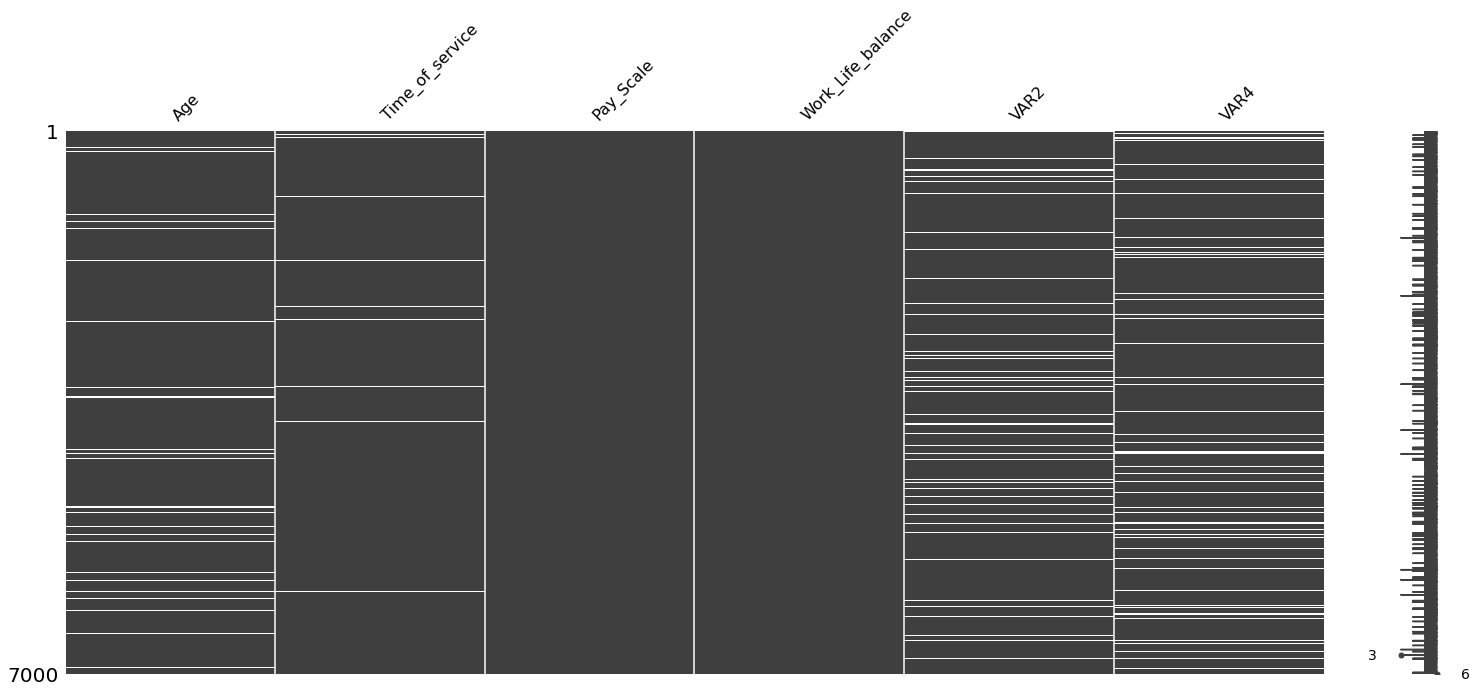

In [ ]:
missingdata_df = df.columns[df.isnull().any()].tolist()
msno.matrix(df[missingdata_df])

The missingno bar chart is a visualization of the data nullity. We log transformed the data on the y-axis to better visualize features with very large missing values.

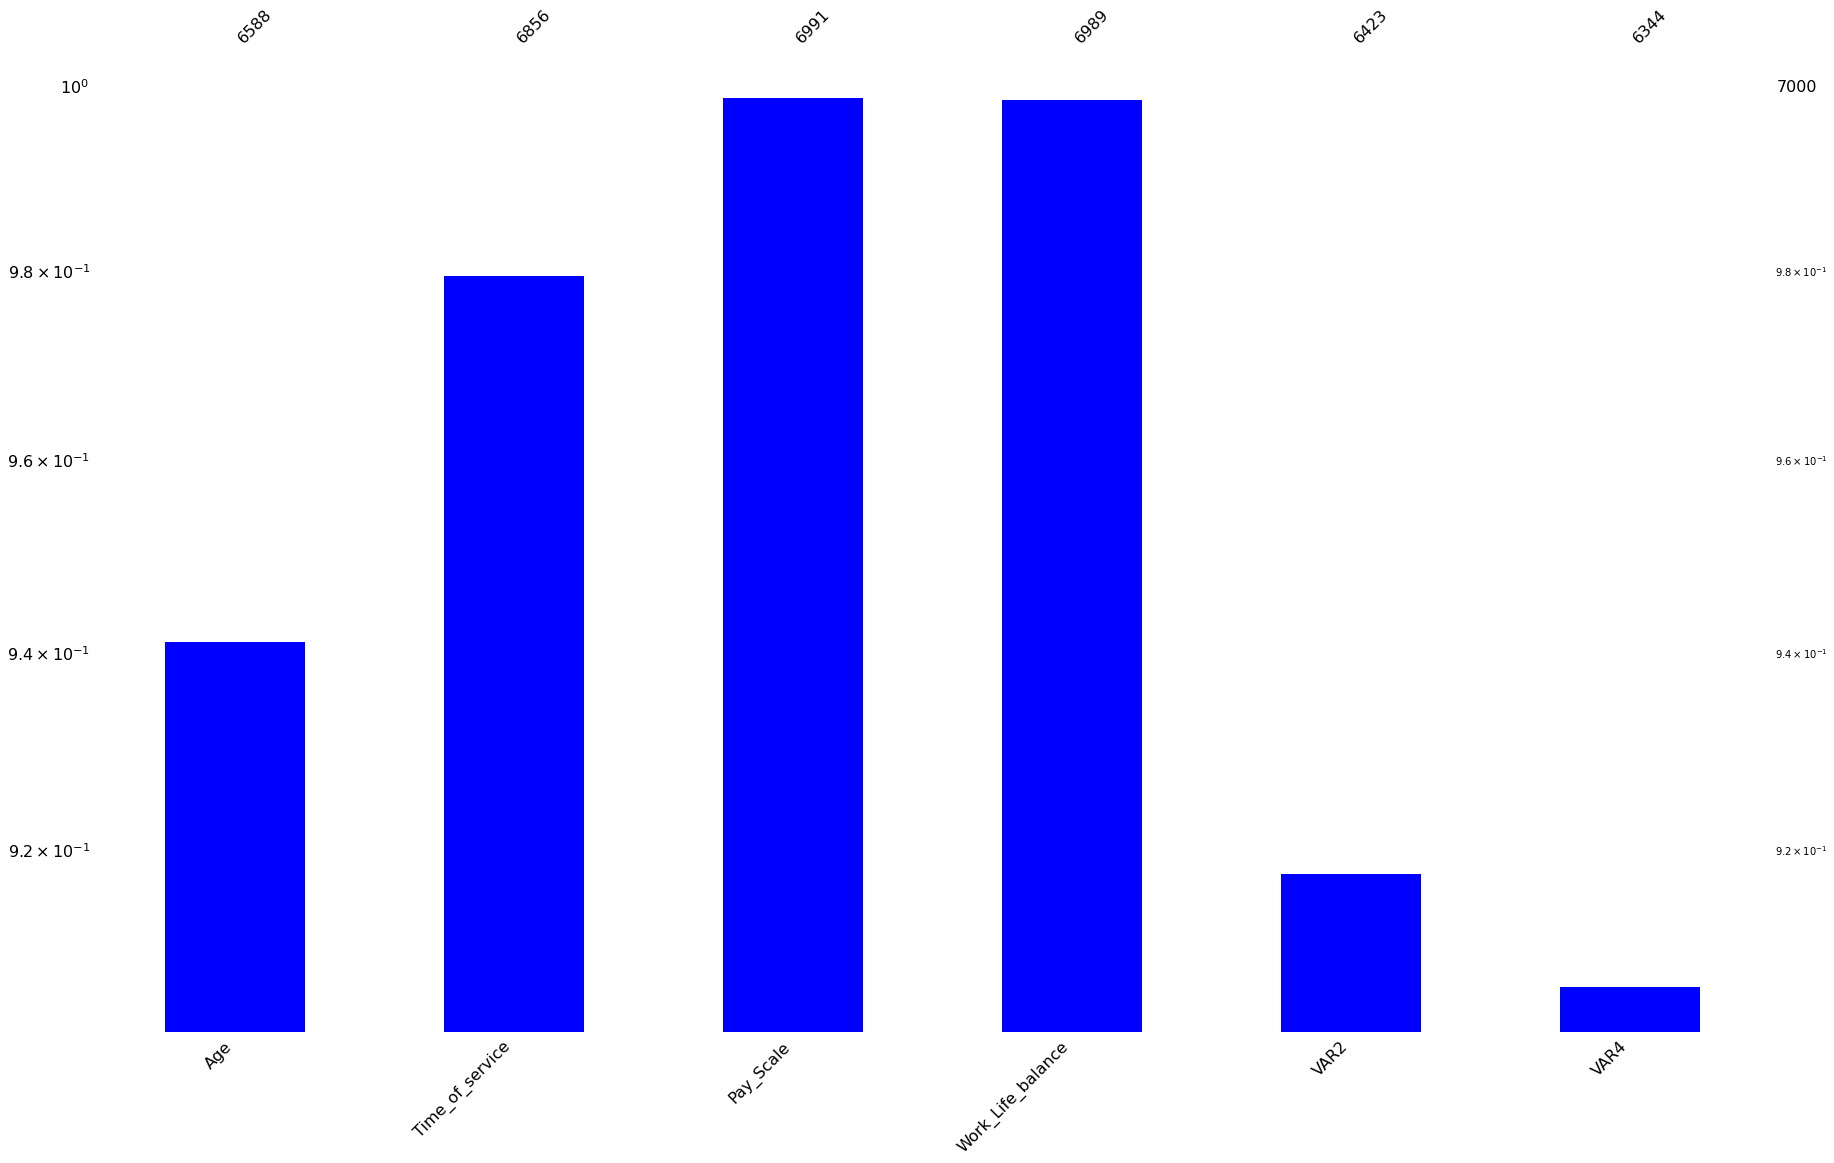

In [ ]:
msno.bar(df[missingdata_df], color="blue", log=True, figsize=(30,18))

Finally, a simple correlation heatmap is shown below. This map describes the degree of nullity relationship between the different features. The range of this nullity correlation is from -1 to 1 (-1 ≤ R ≤ 1). Features with no missing value are excluded in the heatmap. If the nullity correlation is very close to zero (-0.05 < R < 0.05), no value will be displayed. Also, a perfect positive nullity correlation (R=1) indicates when the first feature and the second feature both have corresponding missing values while a perfect negative nullity correlation (R=-1) means that one of the features is missing and the second is not missing.

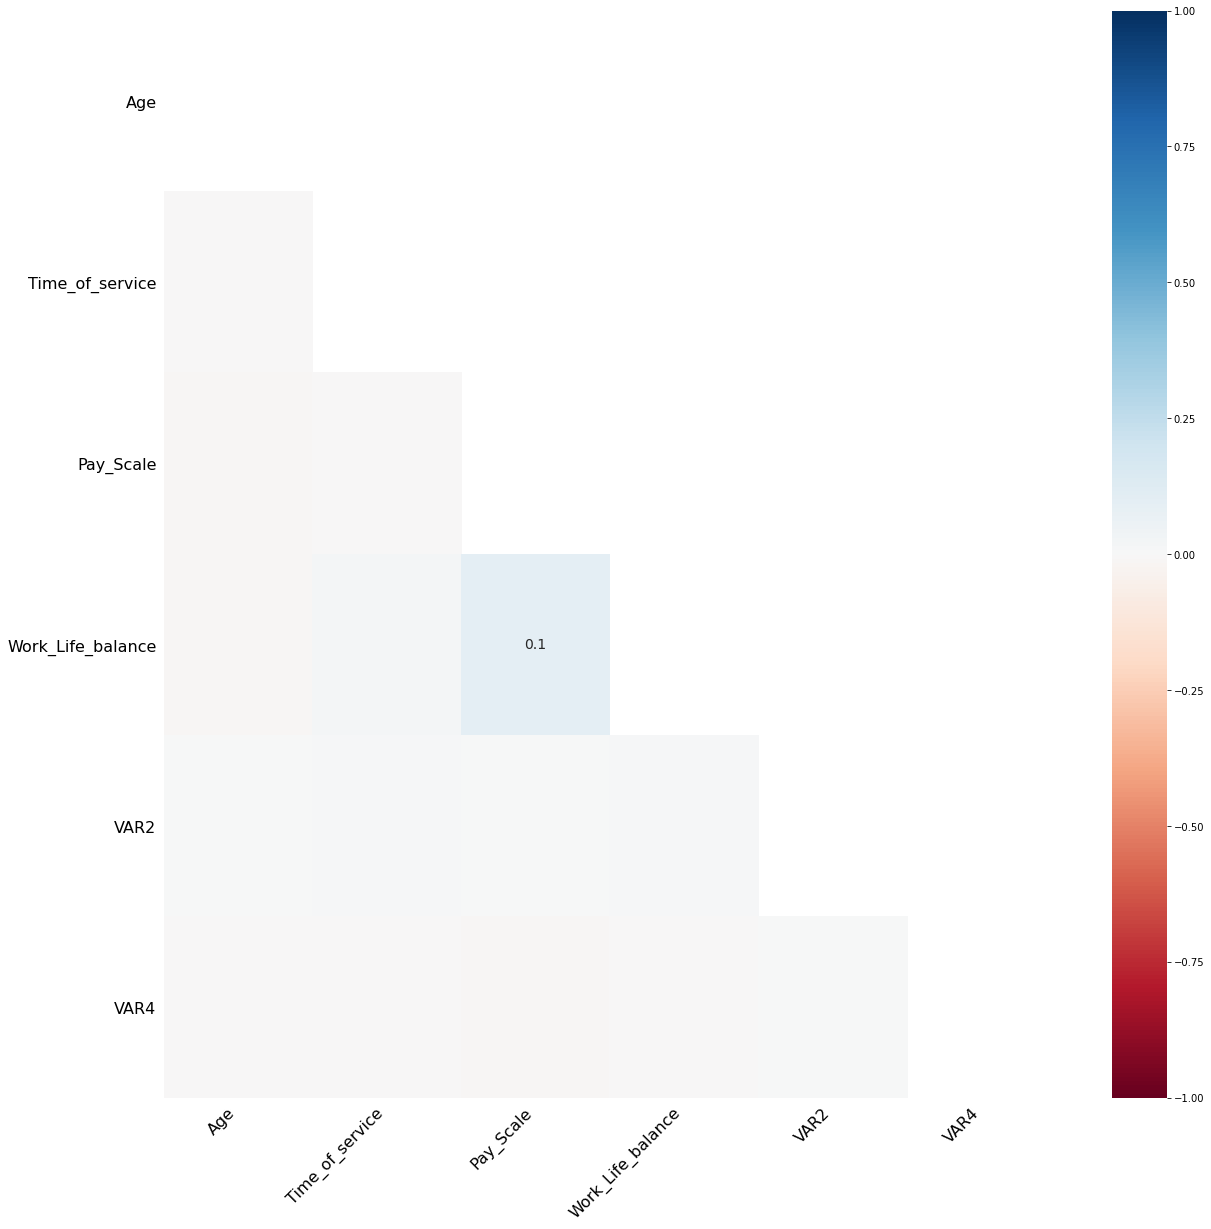

In [ ]:
msno.heatmap(df[missingdata_df], figsize=(20,20))

![alt text](https://miro.medium.com/max/1400/1*Nph7tFVhdnFjJWHMKof-0A.png)

`sklearn.preprocessing.Imputer(missing_values='NaN', strategy='mean', axis=0, verbose=0, copy=True)`. Strategy is the imputation strategy and the default is the` "mean"` of the axis (0 for columns and 1 for rows). The other strategies are` "median" and "most_frequent"`. Another API that can be used for this imputation is `fancyimpute.SimpleFill().`

##Data Imputation

In [ ]:
df.head()

,Employee_ID,Gender,Age,Education_Level,Relationship_Status,Hometown,Unit,Decision_skill_possess,Time_of_service,Time_since_promotion,growth_rate,Travel_Rate,Post_Level,Pay_Scale,Compensation_and_Benefits,Work_Life_balance,VAR1,VAR2,VAR3,VAR4,VAR5,VAR6,VAR7,Attrition_rate
0,EID_23371,F,42.0,4,Married,Franklin,IT,Conceptual,4.0,4,33,1,1,7.0,type2,3.0,4,0.7516,1.8688,2.0,4,5,3,0.1841
1,EID_18000,M,24.0,3,Single,Springfield,Logistics,Analytical,5.0,4,36,0,3,6.0,type2,4.0,3,-0.9612,-0.4537,2.0,3,5,3,0.0670
2,EID_3891,F,58.0,3,Married,Clinton,Quality,Conceptual,27.0,3,51,0,2,8.0,type2,1.0,4,-0.9612,-0.4537,3.0,3,8,3,0.0851
3,EID_17492,F,26.0,3,Single,Lebanon,Human Resource Management,Behavioral,4.0,3,56,1,3,8.0,type2,1.0,3,-1.8176,-0.4537,NaN,3,7,3,0.0668
4,EID_22534,F,31.0,1,Married,Springfield,Logistics,Conceptual,5.0,4,62,1,3,2.0,type3,3.0,1,0.7516,-0.4537,2.0,2,8,2,0.1827


In [ ]:
dft.head()

,Employee_ID,Gender,Age,Education_Level,Relationship_Status,Hometown,Unit,Decision_skill_possess,Time_of_service,Time_since_promotion,growth_rate,Travel_Rate,Post_Level,Pay_Scale,Compensation_and_Benefits,Work_Life_balance,VAR1,VAR2,VAR3,VAR4,VAR5,VAR6,VAR7
0,EID_22713,F,32.0,5,Single,Springfield,R&D,Conceptual,7.0,4,30,1,5,4.0,type2,1.0,3,-0.9612,-0.4537,2.0,1,8,4
1,EID_9658,M,65.0,2,Single,Lebanon,IT,Directive,41.0,2,72,1,1,1.0,type2,1.0,4,-0.9612,0.7075,1.0,2,8,2
2,EID_22203,M,52.0,3,Married,Springfield,Sales,Directive,21.0,3,25,0,1,8.0,type3,1.0,4,-0.1048,0.7075,2.0,1,9,3
3,EID_7652,M,50.0,5,Single,Washington,Marketing,Analytical,11.0,4,28,1,1,2.0,type0,4.0,3,-0.1048,0.7075,2.0,2,8,3
4,EID_6516,F,44.0,3,Married,Franklin,R&D,Conceptual,12.0,4,47,1,3,2.0,type2,4.0,4,1.6081,0.7075,2.0,2,7,4


In [ ]:
#train
one_hot = pd.get_dummies(df['Gender'])
df = df.drop('Gender',axis = 1)
df = df.join(one_hot)

one_hot = pd.get_dummies(df['Relationship_Status'])
df = df.drop('Relationship_Status',axis = 1)
df = df.join(one_hot)

one_hot = pd.get_dummies(df['Hometown'])
df = df.drop('Hometown',axis = 1)
df = df.join(one_hot)

one_hot = pd.get_dummies(df['Unit'])
df = df.drop('Unit',axis = 1)
df = df.join(one_hot)

one_hot = pd.get_dummies(df['Decision_skill_possess'])
df = df.drop('Decision_skill_possess',axis = 1)
df = df.join(one_hot)

one_hot = pd.get_dummies(df['Compensation_and_Benefits'])
df = df.drop('Compensation_and_Benefits',axis = 1)
df = df.join(one_hot)

#test
one_hot = pd.get_dummies(dft['Gender'])
dft = dft.drop('Gender',axis = 1)
dft = dft.join(one_hot)

one_hot = pd.get_dummies(dft['Relationship_Status'])
dft = dft.drop('Relationship_Status',axis = 1)
dft = dft.join(one_hot)

one_hot = pd.get_dummies(dft['Hometown'])
dft = dft.drop('Hometown',axis = 1)
dft = dft.join(one_hot)

one_hot = pd.get_dummies(dft['Unit'])
dft = dft.drop('Unit',axis = 1)
dft = dft.join(one_hot)

one_hot = pd.get_dummies(dft['Decision_skill_possess'])
dft = dft.drop('Decision_skill_possess',axis = 1)
dft = dft.join(one_hot)

one_hot = pd.get_dummies(dft['Compensation_and_Benefits'])
dft = dft.drop('Compensation_and_Benefits',axis = 1)
dft = dft.join(one_hot)

encoded_df = df
encoded_dft = dft
del encoded_df['Employee_ID']
del encoded_dft['Employee_ID']

In [ ]:
encoded_df.head()

,Age,Education_Level,Time_of_service,Time_since_promotion,growth_rate,Travel_Rate,Post_Level,Pay_Scale,Work_Life_balance,VAR1,VAR2,VAR3,VAR4,VAR5,VAR6,VAR7,Attrition_rate,F,M,Married,Single,Clinton,Franklin,Lebanon,Springfield,Washington,Accounting and Finance,Human Resource Management,IT,Logistics,Marketing,Operarions,Production,Purchasing,Quality,R&D,Sales,Security,Analytical,Behavioral,Conceptual,Directive,type0,type1,type2,type3,type4
0,42.0,4,4.0,4,33,1,1,7.0,3.0,4,0.7516,1.8688,2.0,4,5,3,0.1841,1,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0
1,24.0,3,5.0,4,36,0,3,6.0,4.0,3,-0.9612,-0.4537,2.0,3,5,3,0.0670,0,1,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0
2,58.0,3,27.0,3,51,0,2,8.0,1.0,4,-0.9612,-0.4537,3.0,3,8,3,0.0851,1,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0
3,26.0,3,4.0,3,56,1,3,8.0,1.0,3,-1.8176,-0.4537,NaN,3,7,3,0.0668,1,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0
4,31.0,1,5.0,4,62,1,3,2.0,3.0,1,0.7516,-0.4537,2.0,2,8,2,0.1827,1,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0


In [ ]:
encoded_dft.head()

,Age,Education_Level,Time_of_service,Time_since_promotion,growth_rate,Travel_Rate,Post_Level,Pay_Scale,Work_Life_balance,VAR1,VAR2,VAR3,VAR4,VAR5,VAR6,VAR7,F,M,Married,Single,Clinton,Franklin,Lebanon,Springfield,Washington,Accounting and Finance,Human Resource Management,IT,Logistics,Marketing,Operarions,Production,Purchasing,Quality,R&D,Sales,Security,Analytical,Behavioral,Conceptual,Directive,type0,type1,type2,type3,type4
0,32.0,5,7.0,4,30,1,5,4.0,1.0,3,-0.9612,-0.4537,2.0,1,8,4,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0
1,65.0,2,41.0,2,72,1,1,1.0,1.0,4,-0.9612,0.7075,1.0,2,8,2,0,1,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0
2,52.0,3,21.0,3,25,0,1,8.0,1.0,4,-0.1048,0.7075,2.0,1,9,3,0,1,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0
3,50.0,5,11.0,4,28,1,1,2.0,4.0,3,-0.1048,0.7075,2.0,2,8,3,0,1,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0
4,44.0,3,12.0,4,47,1,3,2.0,4.0,4,1.6081,0.7075,2.0,2,7,4,1,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0


In [ ]:
!pip install fancyimpute

###KNN

In [ ]:
from fancyimpute import KNN
imputer = KNN(4) #use 2 nearest rows which have a feature to fill in each row’s missing features
df_fancy_knn = imputer.fit_transform(encoded_df)
dft_fancy_knn = imputer.fit_transform(encoded_dft)

/usr/local/lib/python3.6/dist-packages/sklearn/externals/six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)
Using TensorFlow backend.


Imputing row 1/7000 with 0 missing, elapsed time: 16.115
Imputing row 101/7000 with 0 missing, elapsed time: 16.118
Imputing row 201/7000 with 1 missing, elapsed time: 16.120
Imputing row 301/7000 with 1 missing, elapsed time: 16.122
Imputing row 401/7000 with 0 missing, elapsed time: 16.124
Imputing row 501/7000 with 1 missing, elapsed time: 16.126
Imputing row 601/7000 with 0 missing, elapsed time: 16.128
Imputing row 701/7000 with 0 missing, elapsed time: 16.130
Imputing row 801/7000 with 0 missing, elapsed time: 16.132
Imputing row 901/7000 with 0 missing, elapsed time: 16.134
Imputing row 1001/7000 with 0 missing, elapsed time: 16.136
Imputing row 1101/7000 with 0 missing, elapsed time: 16.138
Imputing row 1201/7000 with 0 missing, elapsed time: 16.140
Imputing row 1301/7000 with 0 missing, elapsed time: 16.142
Imputing row 1401/7000 with 0 missing, elapsed time: 16.145
Imputing row 1501/7000 with 0 missing, elapsed time: 16.147
Imputing row 1601/7000 with 1 missing, elapsed time:

In [ ]:
imputed_df_knn = pd.DataFrame(data=df_fancy_knn, columns=["Age", "Education_Level", 'Time_of_service','Time_since_promotion','growth_rate','Travel_Rate',	'Post_Level',	'Pay_Scale',	'Work_Life_balance',
                                                 'VAR1','VAR2',	'VAR3'	,'VAR4'	,'VAR5'	,'VAR6','VAR7',	'Attrition_rate',	'F'	,'M',	'Married'	,'Single'	,'Clinton',
                                                 'Franklin'	,'Lebanon',	'Springfield',	'Washington'	,'Accounting and Finance',	'Human Resource Management'	,
                                                 'IT'	,'Logistics',	'Marketing',	'Operarions'	,'Production',	'Purchasing',	'Quality'	,'R&D',	'Sales'	,'Security',
                                                 'Analytical',	'Behavioral',	'Conceptual',	'Directive','type0','type1',	'type2'	,'type3',	'type4'])

imputed_dft_knn = pd.DataFrame(data=dft_fancy_knn, columns=["Age", "Education_Level", 'Time_of_service','Time_since_promotion','growth_rate','Travel_Rate',	'Post_Level',	'Pay_Scale',	'Work_Life_balance',
                                                 'VAR1','VAR2',	'VAR3'	,'VAR4'	,'VAR5'	,'VAR6','VAR7',	'F'	,'M',	'Married'	,'Single'	,'Clinton',
                                                 'Franklin'	,'Lebanon',	'Springfield',	'Washington'	,'Accounting and Finance',	'Human Resource Management'	,
                                                 'IT'	,'Logistics',	'Marketing',	'Operarions'	,'Production',	'Purchasing',	'Quality'	,'R&D',	'Sales'	,'Security',
                                                 'Analytical',	'Behavioral',	'Conceptual',	'Directive','type0','type1',	'type2'	,'type3',	'type4'])

df = pd.read_csv('/content/Dataset/Train.csv')
dft = pd.read_csv('/content/Dataset/Test.csv')

In [ ]:
imputed_df_knn['Employee_ID'] = df['Employee_ID']
imputed_df_knn.head()

,Age,Education_Level,Time_of_service,Time_since_promotion,growth_rate,Travel_Rate,Post_Level,Pay_Scale,Work_Life_balance,VAR1,VAR2,VAR3,VAR4,VAR5,VAR6,VAR7,Attrition_rate,F,M,Married,Single,Clinton,Franklin,Lebanon,Springfield,Washington,Accounting and Finance,Human Resource Management,IT,Logistics,Marketing,Operarions,Production,Purchasing,Quality,R&D,Sales,Security,Analytical,Behavioral,Conceptual,Directive,type0,type1,type2,type3,type4,Employee_ID
0,42.0,4.0,4.0,4.0,33.0,1.0,1.0,7.0,3.0,4.0,0.7516,1.8688,2.0,4.0,5.0,3.0,0.1841,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,EID_23371
1,24.0,3.0,5.0,4.0,36.0,0.0,3.0,6.0,4.0,3.0,-0.9612,-0.4537,2.0,3.0,5.0,3.0,0.0670,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,EID_18000
2,58.0,3.0,27.0,3.0,51.0,0.0,2.0,8.0,1.0,4.0,-0.9612,-0.4537,3.0,3.0,8.0,3.0,0.0851,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,EID_3891
3,26.0,3.0,4.0,3.0,56.0,1.0,3.0,8.0,1.0,3.0,-1.8176,-0.4537,2.0,3.0,7.0,3.0,0.0668,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,EID_17492
4,31.0,1.0,5.0,4.0,62.0,1.0,3.0,2.0,3.0,1.0,0.7516,-0.4537,2.0,2.0,8.0,2.0,0.1827,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,EID_22534


In [ ]:
imputed_dft_knn['Employee_ID'] = dft['Employee_ID']
imputed_dft_knn.head()

,Age,Education_Level,Time_of_service,Time_since_promotion,growth_rate,Travel_Rate,Post_Level,Pay_Scale,Work_Life_balance,VAR1,VAR2,VAR3,VAR4,VAR5,VAR6,VAR7,F,M,Married,Single,Clinton,Franklin,Lebanon,Springfield,Washington,Accounting and Finance,Human Resource Management,IT,Logistics,Marketing,Operarions,Production,Purchasing,Quality,R&D,Sales,Security,Analytical,Behavioral,Conceptual,Directive,type0,type1,type2,type3,type4,Employee_ID
0,32.0,5.0,7.0,4.0,30.0,1.0,5.0,4.0,1.0,3.0,-0.9612,-0.4537,2.0,1.0,8.0,4.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,EID_22713
1,65.0,2.0,41.0,2.0,72.0,1.0,1.0,1.0,1.0,4.0,-0.9612,0.7075,1.0,2.0,8.0,2.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,EID_9658
2,52.0,3.0,21.0,3.0,25.0,0.0,1.0,8.0,1.0,4.0,-0.1048,0.7075,2.0,1.0,9.0,3.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,EID_22203
3,50.0,5.0,11.0,4.0,28.0,1.0,1.0,2.0,4.0,3.0,-0.1048,0.7075,2.0,2.0,8.0,3.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,EID_7652
4,44.0,3.0,12.0,4.0,47.0,1.0,3.0,2.0,4.0,4.0,1.6081,0.7075,2.0,2.0,7.0,4.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,EID_6516


###Mice

In [ ]:
from fancyimpute import IterativeImputer
mice_impute = IterativeImputer()
df_fancy_mice = mice_impute.fit_transform(encoded_df)
dft_fancy_mice = mice_impute.fit_transform(encoded_dft)

In [ ]:
imputed_df_mice = pd.DataFrame(data=df_fancy_mice, columns=["Age", "Education_Level",
                                                 'Time_of_service','Time_since_promotion','growth_rate','Travel_Rate',	'Post_Level',	'Pay_Scale',	'Work_Life_balance',
                                                 'VAR1','VAR2',	'VAR3'	,'VAR4'	,'VAR5'	,'VAR6','VAR7',	'Attrition_rate',	'F'	,'M',	'Married'	,'Single'	,'Clinton',
                                                 'Franklin'	,'Lebanon',	'Springfield',	'Washington'	,'Accounting and Finance',	'Human Resource Management'	,
                                                 'IT'	,'Logistics',	'Marketing',	'Operarions'	,'Production',	'Purchasing',	'Quality'	,'R&D',	'Sales'	,'Security',
                                                 'Analytical',	'Behavioral',	'Conceptual',	'Directive','type0','type1',	'type2'	,'type3',	'type4'])

imputed_dft_mice = pd.DataFrame(data=dft_fancy_mice, columns=["Age", "Education_Level",
                                                 'Time_of_service','Time_since_promotion','growth_rate','Travel_Rate',	'Post_Level',	'Pay_Scale',	'Work_Life_balance',
                                                 'VAR1','VAR2',	'VAR3'	,'VAR4'	,'VAR5'	,'VAR6','VAR7',	'F'	,'M',	'Married'	,'Single'	,'Clinton',
                                                 'Franklin'	,'Lebanon',	'Springfield',	'Washington'	,'Accounting and Finance',	'Human Resource Management'	,
                                                 'IT'	,'Logistics',	'Marketing',	'Operarions'	,'Production',	'Purchasing',	'Quality'	,'R&D',	'Sales'	,'Security',
                                                 'Analytical',	'Behavioral',	'Conceptual',	'Directive','type0','type1',	'type2'	,'type3',	'type4'])

df = pd.read_csv('/content/Dataset/Train.csv')
dft = pd.read_csv('/content/Dataset/Test.csv')

imputed_df_mice['Employee_ID'] = df['Employee_ID']
imputed_dft_mice['Employee_ID'] = dft['Employee_ID']

In [ ]:
test1.to_csv('mice_df.csv')

###FancyImpute - Others

In [ ]:
from fancyimpute import KNN, NuclearNormMinimization, SoftImpute, BiScaler

# X is the complete data matrix
# X_incomplete has the same values as X except a subset have been replace with NaN

# Use 3 nearest rows which have a feature to fill in each row's missing features
X_filled_knn = KNN(k=3).fit_transform(X_incomplete)

# matrix completion using convex optimization to find low-rank solution
# that still matches observed values. Slow!
X_filled_nnm = NuclearNormMinimization().fit_transform(X_incomplete)

# Instead of solving the nuclear norm objective directly, instead
# induce sparsity using singular value thresholding
X_incomplete_normalized = BiScaler().fit_transform(X_incomplete)
X_filled_softimpute = SoftImpute().fit_transform(X_incomplete_normalized)

# print mean squared error for the  imputation methods above
nnm_mse = ((X_filled_nnm[missing_mask] - X[missing_mask]) ** 2).mean()
print("Nuclear norm minimization MSE: %f" % nnm_mse)

softImpute_mse = ((X_filled_softimpute[missing_mask] - X[missing_mask]) ** 2).mean()
print("SoftImpute MSE: %f" % softImpute_mse)

knn_mse = ((X_filled_knn[missing_mask] - X[missing_mask]) ** 2).mean()
print("knnImpute MSE: %f" % knn_mse)

###DataWig - Imputation for Tables

In [ ]:
#for gpu
!wget https://raw.githubusercontent.com/awslabs/datawig/master/requirements/requirements.gpu-cu${CUDA_VERSION}.txt
!pip install datawig --no-deps -r requirements.gpu-cu${CUDA_VERSION}.txt
!rm requirements.gpu-cu${CUDA_VERSION}.txt

--2020-06-14 13:55:14--  https://raw.githubusercontent.com/awslabs/datawig/master/requirements/requirements.gpu-cu10.1.243.txt
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.0.133, 151.101.64.133, 151.101.128.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.0.133|:443... connected.
HTTP request sent, awaiting response... 404 Not Found
2020-06-14 13:55:14 ERROR 404: Not Found.

ERROR: Could not open requirements file: [Errno 2] No such file or directory: 'requirements.gpu-cu10.1.243.txt'
rm: cannot remove 'requirements.gpu-cu10.1.243.txt': No such file or directory


In [ ]:
#for cpu
!pip install datawig

     |████████████████████████████████| 13.8MB 234kB/s 
ERROR: xarray 0.15.1 has requirement numpy>=1.15, but you'll have numpy 1.14.6 which is incompatible.
ERROR: umap-learn 0.4.4 has requirement numpy>=1.17, but you'll have numpy 1.14.6 which is incompatible.
ERROR: tifffile 2020.6.3 has requirement numpy>=1.15.1, but you'll have numpy 1.14.6 which is incompatible.
ERROR: tensorflow 2.2.0 has requirement numpy<2.0,>=1.16.0, but you'll have numpy 1.14.6 which is incompatible.
ERROR: spacy 2.2.4 has requirement numpy>=1.15.0, but you'll have numpy 1.14.6 which is incompatible.
ERROR: plotnine 0.6.0 has requirement numpy>=1.16.0, but you'll have numpy 1.14.6 which is incompatible.
ERROR: numba 0.48.0 has requirement numpy>=1.15, but you'll have numpy 1.14.6 which is incompatible.
ERROR: imgaug 0.2.9 has requirement numpy>=1.15.0, but you'll have numpy 1.14.6 which is incompatible.
ERROR: google-colab 1.0.0 has requirement pandas~=1.0.0; python_version >= "3.0", but you'll have pandas 0

In [ ]:
df.isnull().sum()

Employee_ID                    0
Gender                         0
Age                          412
Education_Level                0
Relationship_Status            0
Hometown                       0
Unit                           0
Decision_skill_possess         0
Time_of_service              144
Time_since_promotion           0
growth_rate                    0
Travel_Rate                    0
Post_Level                     0
Pay_Scale                      9
Compensation_and_Benefits      0
Work_Life_balance             11
VAR1                           0
VAR2                         577
VAR3                           0
VAR4                         656
VAR5                           0
VAR6                           0
VAR7                           0
Attrition_rate                 0
dtype: int64

In [ ]:
#Quickstart Example
import datawig, numpy
# impute missing values
df_with_missing_imputed = datawig.SimpleImputer.complete(df)

KeyboardInterrupt: ignored

Imputation of categorical columns


In [ ]:
import datawig
df_train, df_test = datawig.utils.random_split(df)

#Initialize a SimpleImputer model
imputer = datawig.SimpleImputer(
    input_columns=['sentences'], # column(s) containing information about the column we want to impute
    output_column='label', # the column we'd like to impute values for
    output_path = 'imputer_model' # stores model data and metrics
    )

#Fit an imputer model on the train data
imputer.fit(train_df=df_train)

#Impute missing values and return original dataframe with predictions
imputed = imputer.predict(df_test)

Imputation of numerical columns

In [ ]:
import datawig      
df_train, df_test = datawig.utils.random_split(df)

#Initialize a SimpleImputer model
imputer = datawig.SimpleImputer(
    input_columns=['x'], # column(s) containing information about the column we want to impute
    output_column='y', # the column we'd like to impute values for
    output_path = 'imputer_model' # stores model data and metrics
    )

#Fit an imputer model on the train data
imputer.fit(train_df=df_train, num_epochs=50)

#Impute missing values and return original dataframe with predictions
imputed = imputer.predict(df_test)

##Modelling

In [ ]:
import numpy as np
import pandas as pd
from math import sqrt
import xgboost as xgb
from sklearn import preprocessing
from sklearn.metrics import r2_score
from xgboost.sklearn import XGBRegressor
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import GridSearchCV, train_test_split, RandomizedSearchCV

In [ ]:
# Organize our data for training
X = imputed_df_mice.drop(["Attrition_rate","Employee_ID"], axis=1)
Y = imputed_df_mice["Attrition_rate"]
X, X_Val, Y, Y_Val = train_test_split(X, Y,test_size=0.2,random_state=100)

In [ ]:
# Various hyper-parameters to tune
xgb1 = XGBRegressor(seed=100)

params = {'learning_rate': [0.05],
          'n_estimators': [5000],
          'max_depth': [3],
          'min_child_weight': [3],
          'gamma':[0],
          'subsample': [0.95],
          'colsample_bytree': [0.8],
          'reg_alpha':[100],
          'reg_lambda':[100],
          'gpu_id':[0],
          'max_bin':[16],
          'tree_method':['gpu_hist'],
          'eval_metric':['rmse']}

In [ ]:
rscvj1 = RandomizedSearchCV(xgb1,
                            params,
                            n_jobs=-1,
                            cv=2)
rscvj1.fit(X,Y)
print("Best Parameters")
print(rscvj1.best_params_)
print("--------------------------------------------")
print("R2-Score")
print(round(r2_score(Y_Val, rscvj1.best_estimator_.predict(X_Val)),4))
print("--------------------------------------------")
print("RMSE Score")
print(round(sqrt(mean_squared_error(Y_Val, rscvj1.best_estimator_.predict(X_Val))),4))

[13:38:21] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
Best Parameters
{'tree_method': 'gpu_hist', 'subsample': 0.95, 'reg_lambda': 100, 'reg_alpha': 100, 'n_estimators': 5000, 'min_child_weight': 3, 'max_depth': 3, 'max_bin': 16, 'learning_rate': 0.05, 'gpu_id': 0, 'gamma': 0, 'eval_metric': 'rmse', 'colsample_bytree': 0.8}
--------------------------------------------
R2-Score
-0.0135
--------------------------------------------
RMSE Score
0.1853


In [ ]:
best1_jun1 = rscvj1.best_estimator_
best1_jun1

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=0.8, eval_metric='rmse',
             gamma=0, gpu_id=0, importance_type='gain', learning_rate=0.05,
             max_bin=16, max_delta_step=0, max_depth=3, min_child_weight=3,
             missing=None, n_estimators=5000, n_jobs=1, nthread=None,
             objective='reg:linear', random_state=0, reg_alpha=100,
             reg_lambda=100, scale_pos_weight=1, seed=100, silent=None,
             subsample=0.95, tree_method='gpu_hist', verbosity=1)

In [ ]:
imputed_dft_mice['Attrition_rate'] = rscvj1.best_estimator_.predict(imputed_dft_mice.drop(["Employee_ID"], axis=1))
imputed_dft_mice.head(10)

,Age,Education_Level,Time_of_service,Time_since_promotion,growth_rate,Travel_Rate,Post_Level,Pay_Scale,Work_Life_balance,VAR1,VAR2,VAR3,VAR4,VAR5,VAR6,VAR7,F,M,Married,Single,Clinton,Franklin,Lebanon,Springfield,Washington,Accounting and Finance,Human Resource Management,IT,Logistics,Marketing,Operarions,Production,Purchasing,Quality,R&D,Sales,Security,Analytical,Behavioral,Conceptual,Directive,type0,type1,type2,type3,type4,Employee_ID,Attrition_rate
0,32.0,5.0,7.0,4.0,30.0,1.0,5.0,4.0,1.0,3.0,-0.961200,-0.4537,2.0,1.0,8.0,4.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,EID_22713,0.205276
1,65.0,2.0,41.0,2.0,72.0,1.0,1.0,1.0,1.0,4.0,-0.961200,0.7075,1.0,2.0,8.0,2.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,EID_9658,0.205276
2,52.0,3.0,21.0,3.0,25.0,0.0,1.0,8.0,1.0,4.0,-0.104800,0.7075,2.0,1.0,9.0,3.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,EID_22203,0.205276
3,50.0,5.0,11.0,4.0,28.0,1.0,1.0,2.0,4.0,3.0,-0.104800,0.7075,2.0,2.0,8.0,3.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,EID_7652,0.224236
4,44.0,3.0,12.0,4.0,47.0,1.0,3.0,2.0,4.0,4.0,1.608100,0.7075,2.0,2.0,7.0,4.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,EID_6516,0.205276
5,22.0,4.0,3.0,1.0,53.0,0.0,3.0,6.0,1.0,3.0,0.058581,-0.4537,2.0,3.0,8.0,3.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,EID_20283,0.205276
6,42.0,3.0,6.0,4.0,35.0,1.0,3.0,4.0,1.0,3.0,0.751600,1.8688,2.0,3.0,7.0,3.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,EID_21014,0.207861
7,41.0,2.0,4.0,4.0,35.0,1.0,4.0,8.0,1.0,3.0,-0.104800,1.8688,2.0,2.0,7.0,5.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,EID_7693,0.205276
8,31.0,1.0,7.0,3.0,73.0,2.0,3.0,8.0,3.0,3.0,1.608100,0.7075,2.0,2.0,7.0,4.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,EID_13232,0.205276
9,48.0,2.0,16.0,1.0,32.0,1.0,2.0,4.0,3.0,3.0,-0.104800,-0.4537,2.0,4.0,7.0,4.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,EID_6515,0.224236


In [ ]:
out = pd.DataFrame()
out['Employee_ID'] = imputed_dft_mice['Employee_ID']
out['Attrition_rate'] = imputed_dft_mice['Attrition_rate']
out.head(10)

,Employee_ID,Attrition_rate
0,EID_22713,0.205276
1,EID_9658,0.205276
2,EID_22203,0.205276
3,EID_7652,0.224236
4,EID_6516,0.205276
5,EID_20283,0.205276
6,EID_21014,0.207861
7,EID_7693,0.205276
8,EID_13232,0.205276
9,EID_6515,0.224236


In [ ]:
imputed_dft_knn['Attrition_rate'] = rscvj1.best_estimator_.predict(imputed_dft_knn.drop(["Employee_ID"], axis=1))
imputed_dft_knn.head(10)

,Age,Education_Level,Time_of_service,Time_since_promotion,growth_rate,Travel_Rate,Post_Level,Pay_Scale,Work_Life_balance,VAR1,VAR2,VAR3,VAR4,VAR5,VAR6,VAR7,F,M,Married,Single,Clinton,Franklin,Lebanon,Springfield,Washington,Accounting and Finance,Human Resource Management,IT,Logistics,Marketing,Operarions,Production,Purchasing,Quality,R&D,Sales,Security,Analytical,Behavioral,Conceptual,Directive,type0,type1,type2,type3,type4,Employee_ID,Attrition_rate
0,32.0,5.0,7.0,4.0,30.0,1.0,5.0,4.0,1.0,3.0,-0.961200,-0.4537,2.0,1.0,8.0,4.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,EID_22713,0.205276
1,65.0,2.0,41.0,2.0,72.0,1.0,1.0,1.0,1.0,4.0,-0.961200,0.7075,1.0,2.0,8.0,2.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,EID_9658,0.205276
2,52.0,3.0,21.0,3.0,25.0,0.0,1.0,8.0,1.0,4.0,-0.104800,0.7075,2.0,1.0,9.0,3.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,EID_22203,0.205276
3,50.0,5.0,11.0,4.0,28.0,1.0,1.0,2.0,4.0,3.0,-0.104800,0.7075,2.0,2.0,8.0,3.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,EID_7652,0.224236
4,44.0,3.0,12.0,4.0,47.0,1.0,3.0,2.0,4.0,4.0,1.608100,0.7075,2.0,2.0,7.0,4.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,EID_6516,0.205276
5,22.0,4.0,3.0,1.0,53.0,0.0,3.0,6.0,1.0,3.0,-0.110334,-0.4537,2.0,3.0,8.0,3.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,EID_20283,0.205276
6,42.0,3.0,6.0,4.0,35.0,1.0,3.0,4.0,1.0,3.0,0.751600,1.8688,2.0,3.0,7.0,3.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,EID_21014,0.207861
7,41.0,2.0,4.0,4.0,35.0,1.0,4.0,8.0,1.0,3.0,-0.104800,1.8688,2.0,2.0,7.0,5.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,EID_7693,0.205276
8,31.0,1.0,7.0,3.0,73.0,2.0,3.0,8.0,3.0,3.0,1.608100,0.7075,2.0,2.0,7.0,4.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,EID_13232,0.205276
9,48.0,2.0,16.0,1.0,32.0,1.0,2.0,4.0,3.0,3.0,-0.104800,-0.4537,2.0,4.0,7.0,4.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,EID_6515,0.224236


In [ ]:
out = pd.DataFrame()
out['Employee_ID'] = imputed_dft_knn['Employee_ID']
out['Attrition_rate'] = imputed_dft_knn['Attrition_rate']
out.head(10)

,Employee_ID,Attrition_rate
0,EID_22713,0.205276
1,EID_9658,0.205276
2,EID_22203,0.205276
3,EID_7652,0.224236
4,EID_6516,0.205276
5,EID_20283,0.205276
6,EID_21014,0.207861
7,EID_7693,0.205276
8,EID_13232,0.205276
9,EID_6515,0.224236


In [ ]:
out.to_csv('submit.csv',index=False)